<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:100px;" src="https://hpp.education/Lessons/omnes-docet-ubique.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>

<center>
<h3 style="color:#888888;"> <i>--  Simulation numérique en mécanique des fluides  --</i> </h3>
<h1> TP n°3 </h1>
<h3> Représenter un champ de données fluide</h3>
<h4>  </h4>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# la librairie time nous sera utile pour calculer le temps d'execution des scripts
import time 
#Option d'affichage et taille de police sur les figures:
fs=20
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
#plt.rc('text', usetex=True)
%matplotlib inline   

On se propose dans ce TP, de représenter et d'analyser des données issues d'une simulation numérique.

Pour cela on dispose de 3 fichiers:

* CM_rho.dat qui contient les données de pression 
* CM_UX.dat qui contient les données de vitesse longitudinal
* CM_UY.dat qui contient les données de vitesse transversal


Ces données sont issues d'une simulation numérique de l'écoulement autour d'un cylindre de diamètre $D$ pour un nombre de Mach de $M_\infty=0.2$ réalisée sur un maillage structuré uniforme de $400\times200$ mailles. Le centre du cylindre est situé au point $[50,100]$ et son coté est représenté à l'aide de 10 mailles.($D=10$). Les données des fichiers de vitesse sont normalisées par une grandeur de référence: $U_0=588.89$ m/s. Les grandeurs de masse volumique sont normailsées par $\rho_0=1.22 kg/m^3$. On prendra dans pour ce TP la vitesse du son à température normale (20°C) soit $c_\infty=340$m/s. 

Les objectifs de ce TP sont:
* Représenter des données en 2D
* Extraires des informations de ces données
* Calculer d'autres grandeurs issues de ces données.


<h1> 1 - Chargement des données</h1>

D'abord, afin de pouvoir utiliser les données et les représenter, il faut les charger en mémoire c'est à dire lire le fichier de données et les stocker dans un tableau. Pour cela il existe de nombreux moyen en Python. Pour ce TP nous utiliserons la fonction fromfile de numpy qui permet de lire des données binaires.  

Uniquement la première fois que vous executez ce notebook, vous devez télécharger les données en décommentant les lignes suivantes:

In [ ]:
#! wget http://hpp.education/Lessons/CFD_FIP/Files/CM_rho.dat
#! wget http://hpp.education/Lessons/CFD_FIP/Files/CM_UX.dat
#! wget http://hpp.education/Lessons/CFD_FIP/Files/CM_UY.dat

Ensuite, après avoir calculé la valeur de $U_\infty$ on charge les données que l'on va renormaliser:

In [4]:
nx,ny=400,200
U0,Uinf,rho0=588.89,0.2*340,1.2
rho=rho0*np.fromfile('CM_rho.dat').reshape(ny,nx)
ux=U0*np.fromfile('CM_UX.dat').reshape(ny,nx)/Uinf
uy=U0*np.fromfile('CM_UY.dat').reshape(ny,nx)/Uinf
rho.shape

(200, 400)

A partir des données chargées, retouver les valuer min, max et moyenne pour la vitesse longitudinale (la vitesse moyenne doit être proche de 1):

In [5]:
print(ux.min(),ux.max(),ux.mean())

-0.5484267735235642 1.6323198671560888 0.9945092498036856


<h1> 2 - Visualisation des données </h1>

Maintenant que les données sont en mémoire, nous pouvons les "visualiser" en utilisant les fonctions de visualisation 2D. Familiarisez-vous avec les lignes suivantes et comparez les fonctions ***pcolormesh*** et ***contourf***. On pourra également changer les colormap en modifiant le paramètre *cmap*. (Les colormap de matplotlib sont disponibles <a href="https://matplotlib.org/tutorials/colors/colormaps.html">ici</a>)

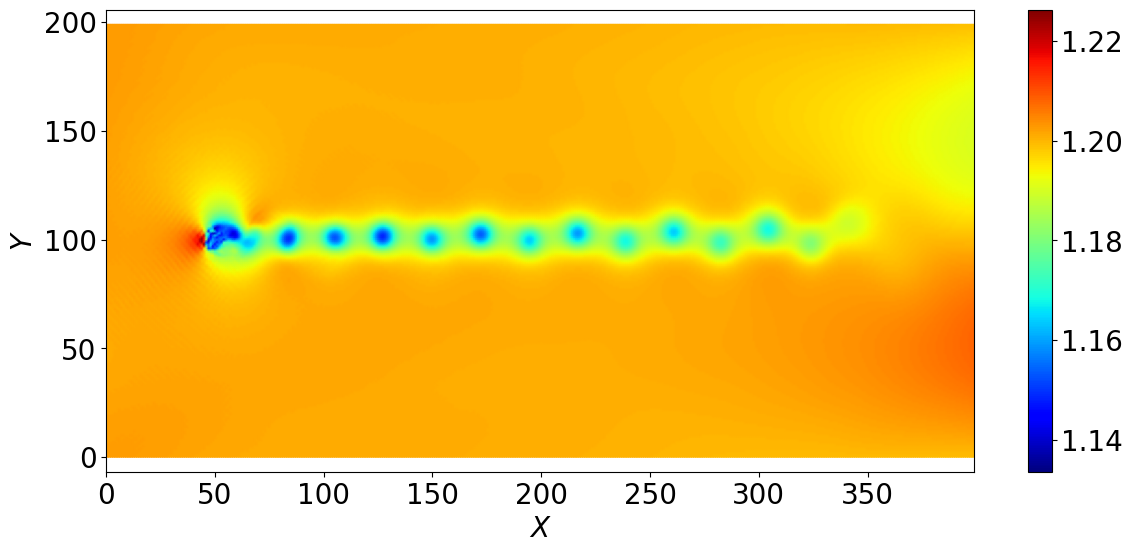

In [6]:
plt.figure(figsize=(14,6))
plt.pcolormesh(rho,cmap="jet",shading="gouraud")
plt.axis('equal')
plt.xlabel('$X$',fontsize=fs)
plt.ylabel('$Y$',fontsize=fs)
plt.colorbar()

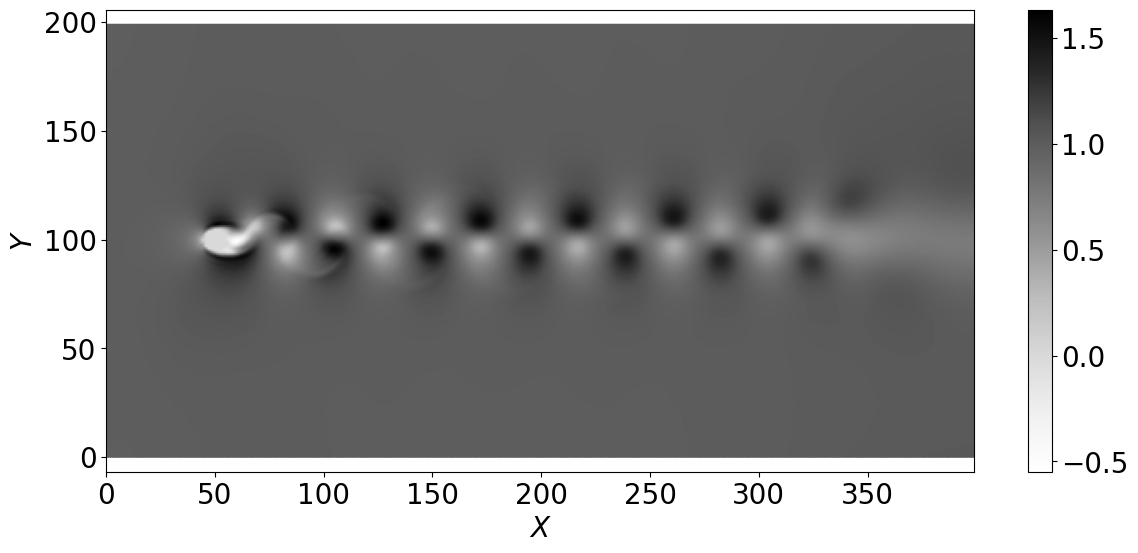

In [7]:
plt.figure(figsize=(14,6))
plt.pcolormesh(ux,cmap="Greys",shading="gouraud")
plt.axis('equal')
plt.xlabel('$X$',fontsize=fs)
plt.ylabel('$Y$',fontsize=fs)
plt.colorbar()

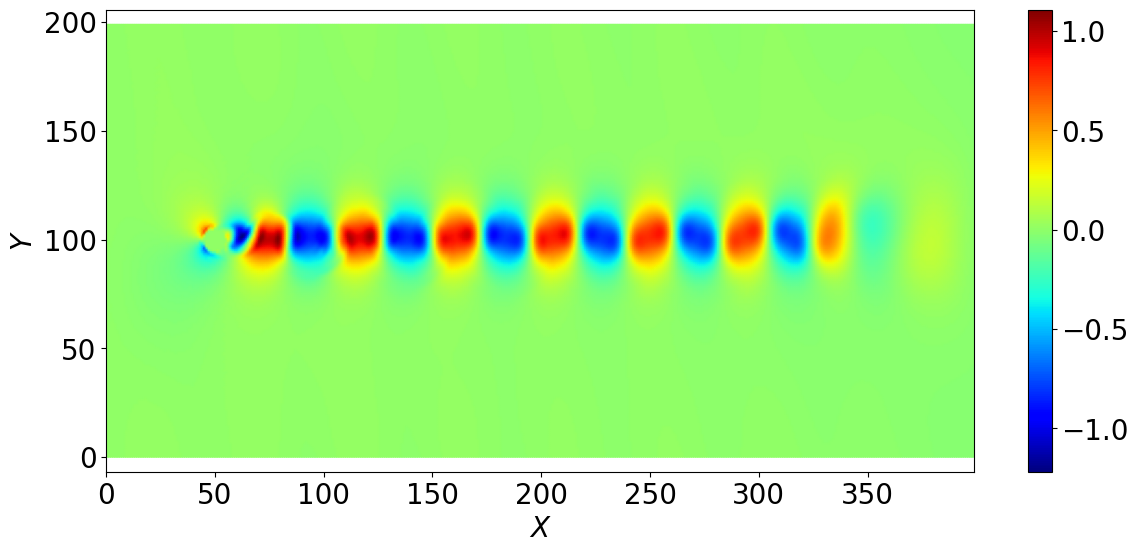

In [8]:
plt.figure(figsize=(14,6))
plt.pcolormesh(uy,cmap="jet",shading="gouraud")
plt.axis('equal')
plt.xlabel('$X$',fontsize=fs)
plt.ylabel('$Y$',fontsize=fs)
plt.colorbar()

Commentaires:


---

Il peut également être utile de représenter une certaine partie des données.

A partir des données chargées, tracer deux profils de pression en amont et en aval du profil:

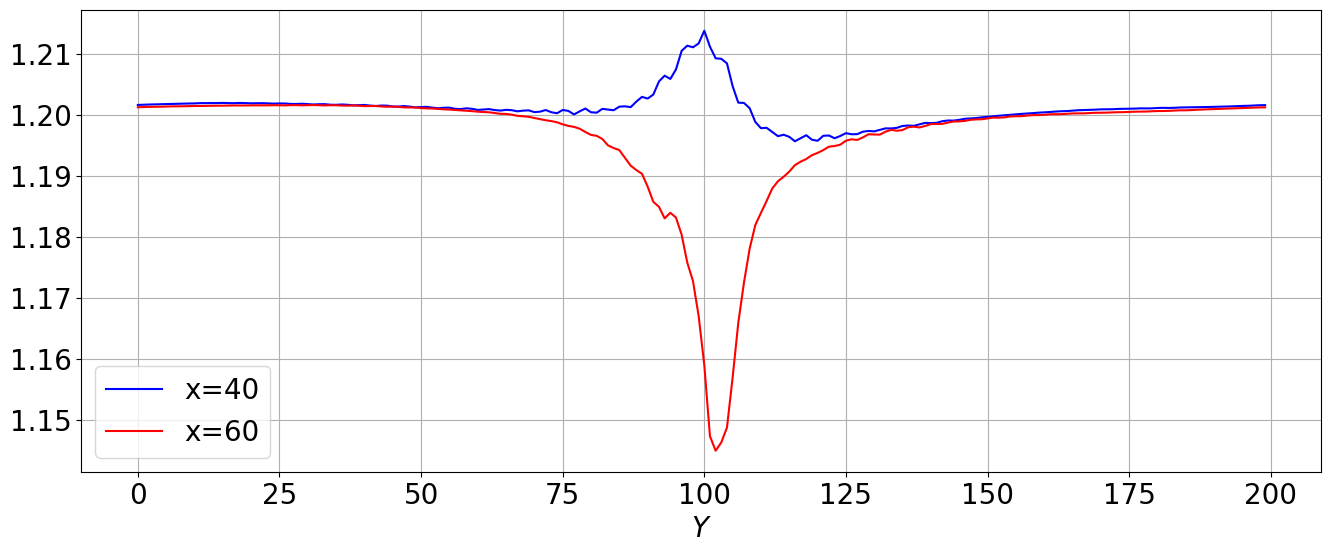

In [9]:
plt.figure(figsize=(16,6))
x1,x2=40,60
plt.plot(rho[:,x1],'b',label="x="+str(x1))
plt.plot(rho[:,x2],'r',label="x="+str(x2))
plt.xlabel('$Y$',fontsize=fs)
plt.legend(fontsize=fs);plt.grid(True)

Même chose pour le profil de vitesse en choisissant 3 lignes longitudinales dont celle qui passe par le plan de symétrie:

In [ ]:
y1,y2,y3=?,?,?

plt.figure(figsize=(16,6))
plt.plot(ux[y1,:],'b',label="y="+str(y1))
plt.plot(ux[y2,:],'k',label="y="+str(y2))
plt.plot(ux[y3,:],'r',label="y="+str(y3))
plt.xlabel('$X$',fontsize=fs)
plt.legend(fontsize=fs);plt.grid(True)

Commentaires:



---

<h1>3 - Calculer d'autre grandeurs</h1>

Calculer les opérateurs différentiels suivant associés au champ de vitesse:

* La divergence de la vitesse: $div(\mathbf{U})=\dfrac{\partial U_x}{\partial x} +\dfrac{\partial U_y}{\partial y} $

* La vorticité: $\omega_z=\begin{array}{c} \dfrac{\partial U_x}{\partial y}-\dfrac{\partial U_y}{\partial x} \end{array} $


On utilisera les approximations vues en cours pour le calcul des dérivées.

In [ ]:
duxdx,duxdy=np.zeros((ny,nx)),np.zeros((ny,nx))
duydx,duydy=np.zeros((ny,nx)),np.zeros((ny,nx))

In [ ]:
duxdx[1:-1,1:-1]=...
duxdy[1:-1,1:-1]=...
duydx[1:-1,1:-1]=...
duydy[1:-1,1:-1]=...

In [ ]:
divU=duxdx+duydy

In [ ]:
Vortz=duydx-duxdy

Représenter la Divergence de la vitesse:

In [ ]:
plt.figure(figsize=(14,6))
plt.pcolormesh(divU,cmap="PuOr",shading="gouraud")
plt.axis('equal')
plt.title('divergence de la vitesse',fontsize=fs)
plt.xlabel('$X$',fontsize=fs)
plt.ylabel('$Y$',fontsize=fs)
plt.colorbar()

**Commentaires**

---

Représenter la vorticité:

In [ ]:
plt.figure(figsize=(14,6))
plt.pcolormesh(Vortz,cmap="PuOr",shading="gouraud")
plt.axis('equal')
plt.title('Champ de vorticité $\omega_z$',,fontsize=fs)
plt.xlabel('$X$',fontsize=fs)
plt.ylabel('$Y$',fontsize=fs)
plt.colorbar()

**Commentaires**

---



# Conclusion

Résumer, les notions importantes mise en évidence dans ce TP. 

---

In [2]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)


<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:100px;" src="https://hpp.education/Lessons/omnes-docet-ubique.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center><a href="#top">Retour en haut de la page</a></center>